Ref. Datacamp

NetworkX API basics

In [26]:
import networkx as nx
import matplotlib as plt
%matplotlib inline

In [15]:
G = nx.Graph()

In [16]:
G.add_nodes_from([1, 2, 3])

In [17]:
G.nodes()

[1, 2, 3]

In [18]:
G.add_edge(1,2)

In [19]:
G.edges()

[(1, 2)]

In [20]:
G.node[1]['color'] = 'blue'

Above adding to the node 1, a key named 'color' which has the value 'blue'. Note how this is very similar to a dictionary. 

In [21]:
G.nodes()

[1, 2, 3]

In [22]:
G.nodes(data = True)

[(1, {'color': 'blue'}), (2, {}), (3, {})]

In [23]:
G.node[2]['feeling'] = 'happy'

In [24]:
G.nodes(data = True)

[(1, {'color': 'blue'}), (2, {'feeling': 'happy'}), (3, {})]

Above command returns a list of two tuples in which the first element of the each tuple is a node and the second element is the dictionary in which the key value pair correspond to metadata.

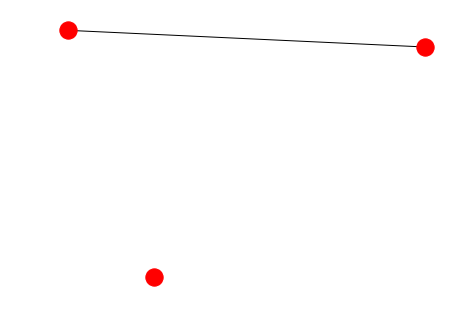

In [27]:
nx.draw(G)

What we have above is called the node-link diagram rendering of the graph.

### Types of graphs

** Undirected graphs: **
Do not have any inherent directionality associated with them. 

In [28]:
type(G)

networkx.classes.graph.Graph

Undirected graphs have the type graph. 

**Directed graphs:** E.g., Twitter's social graph (has the information of who follows whom).  

In [29]:
D = nx.DiGraph()

In [30]:
type(D)

networkx.classes.digraph.DiGraph

Trips between bike sharing stations may be modeled as multi(Di)Graphs. Each trip being one edge between the pair of stations. 

In [32]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [33]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

For memory reasons, we might not want to model multiple edges per pair of nodes and therefore we may want to collapse the edges into a single edge that contains the metadata summary of the original. 

For example edge metadata with value 3 for three rides. 

** Self-loops **

Nodes that are connected to themselves. E.g., bike sharing data, where trip begins at a station and ends at the same session. 

### Visualizing networks

#### Matrix plots:
Nodes are the rows and columns in the matrix and elements are filled in depending on if there is edge in between them. For an undirected graph, the matrix is symmetric along the diagonal. For a directed graph, the matrix is not necessarily symmetric. Fo instance if there is an edge pointing from point A to B, the element AB is filled, but the element BA is not. 

#### Arc plot:
Nodes are ordered along one acis of the plot and edges are drawn using circular arcs from one node to another. If nodes are ordered according to some sort of a rule, e.g., age of social media network of users or geographical proximity of a stations in transport network. Helps to understand connectivity and sorted or grouped property. 

#### Circos plot: 
Transformation of the arc plot such that two ends of the arc plots are joined together in a circle. Aesthetically compact alternative to arc plots. 

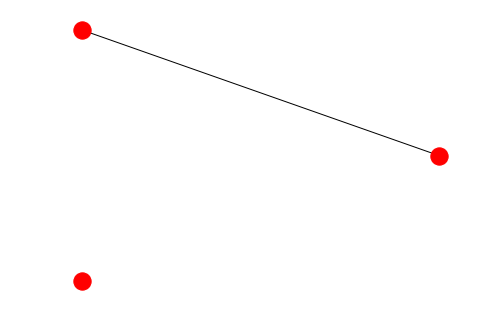

In [35]:
nx.draw_circular(G)

### Identifying node importance

* Degree centrality: 
Number of neighbors node has / number of neighbors node could possibly have.

If self loops allowed: # of neighbors a node could possibly have is every single node in the graph including myself. 

If self loops not allowed: # of neighbors a node could possibly have is every single node in the graph excluding myself. 

Examples of nodes with high degree centrality: 
1. Twitter broadcasters (people who have many follower)
2. Airport transportation hubs
3. Disease super-spreaders. 


* Betweeness centrality

In [36]:
G = nx.Graph()

In [39]:
G.add_nodes_from(range(1,10))

In [42]:
G.nodes()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [43]:
G.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9)])

In [44]:
G.edges()

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]

In [45]:
G.neighbors(1)

[2, 3, 4, 5, 6, 7, 8, 9]

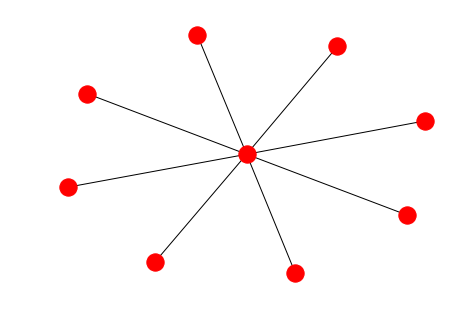

In [46]:
nx.draw(G)

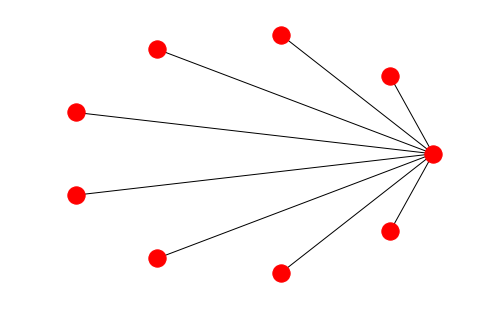

In [47]:
nx.draw_circular(G)

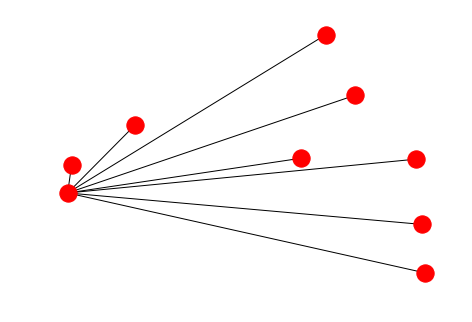

In [49]:
nx.draw_random(G)

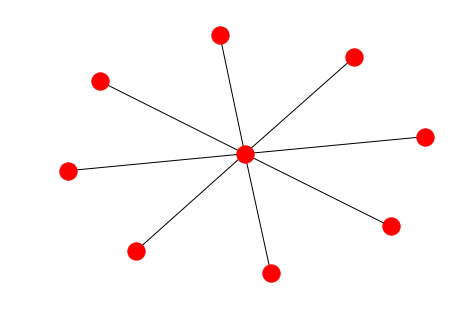

In [50]:
nx.draw_spring(G)

In [54]:
G.neighbors(2)

[1]

In [58]:
next(G.neighbors_iter(1))

2

In [59]:
next(G.neighbors_iter(1))

2

In [60]:
for i in G.neighbors_iter(1):
    print i

2
3
4
5
6
7
8
9


In [64]:
nx.degree_centrality(G)
# key is the node and the value is the degree centrality. 
# In the degree centrality function, self loops are 
# not considered. 

{1: 1.0,
 2: 0.125,
 3: 0.125,
 4: 0.125,
 5: 0.125,
 6: 0.125,
 7: 0.125,
 8: 0.125,
 9: 0.125}